# k-NEAREST NEIGHBORS
---

```julia
versioninfo() # -> v"1.11.1"
```

In [20]:
using Pkg; pkg"activate .."

  Activating project at `~/Work/git-repos/AI-ML-DL/jlai/Codes/Julia/Part-2`


Import librairies

In [21]:
using CSV, DataFrames
using MLJ

Read data from CSV file

In [22]:
df = CSV.read("../../Datasets/Social_Network_Ads.csv", DataFrame)
schema(df)

coerce!(df, 
        :Age => Continuous,
        :EstimatedSalary => Continuous,
        :Purchased => OrderedFactor)
schema(df)

┌─────────────────┬──────────────────┬─────────────────────────────────┐
│ names           │ scitypes         │ types                           │
├─────────────────┼──────────────────┼─────────────────────────────────┤
│ Age             │ Continuous       │ Float64                         │
│ EstimatedSalary │ Continuous       │ Float64                         │
│ Purchased       │ OrderedFactor{2} │ CategoricalValue{Int64, UInt32} │
└─────────────────┴──────────────────┴─────────────────────────────────┘


Unpack features & target

In [23]:
target, features = unpack(df, ==(:Purchased))

(CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  1, 1, 1, 1, 0, 1, 1, 1, 0, 1], 400×2 DataFrame
 Row │ Age      EstimatedSalary 
     │ Float64  Float64         
─────┼──────────────────────────
   1 │    19.0          19000.0
   2 │    35.0          20000.0
   3 │    26.0          43000.0
   4 │    27.0          57000.0
   5 │    19.0          76000.0
   6 │    27.0          58000.0
   7 │    27.0          84000.0
   8 │    32.0         150000.0
   9 │    25.0          33000.0
  10 │    35.0          65000.0
  11 │    26.0          80000.0
  ⋮  │    ⋮            ⋮
 391 │    48.0          33000.0
 392 │    47.0          23000.0
 393 │    45.0          45000.0
 394 │    60.0          42000.0
 395 │    39.0          59000.0
 396 │    46.0          41000.0
 397 │    51.0          23000.0
 398 │    50.0          20000.0
 399 │    36.0          33000.0
 400 │    49.0          36000.0
                379 rows omitted)

Scatter plot

In [24]:
using Plots

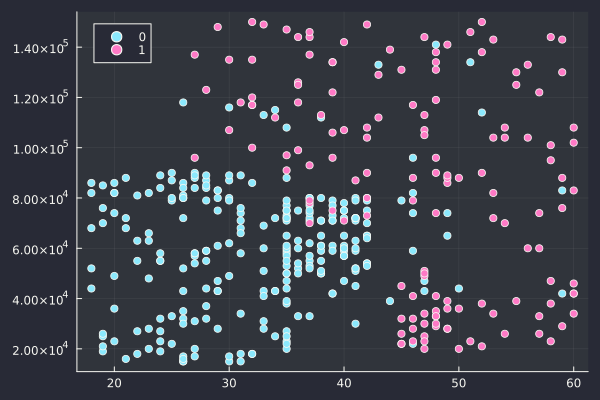

In [25]:
scatter(features.Age, features.EstimatedSalary; group=target)

Split the data into train & test sets

In [26]:
train, test = partition(eachindex(target), 0.8, rng=123)

([279, 255, 57, 399, 34, 267, 165, 35, 148, 56  …  357, 23, 369, 300, 146, 213, 395, 333, 153, 90], [46, 210, 11, 264, 112, 224, 307, 212, 313, 110  …  388, 348, 152, 277, 273, 126, 191, 60, 6, 131])

In [27]:
Xtrain, Xtest = features[train, :], features[test, :]
ytrain, ytest = target[train], target[test]

(CategoricalArrays.CategoricalValue{Int64, UInt32}[1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 0, 1, 0, 0, 0, 0, 0, 0], CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 0, 1, 0, 1, 0, 0  …  0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

Standardizer

In [28]:
sc_ = Standardizer()

Standardizer(
  features = Symbol[], 
  ignore = false, 
  ordered_factor = false, 
  count = false)

Load a knn classifier, w/ # neighbors = 3

In [29]:
KNN = @load KNNClassifier pkg=NearestNeighborModels
knn_ = KNN(K=3)

import NearestNeighborModels ✔


[ Info: For silent loading, specify `verbosity=0`. 


KNNClassifier(
  K = 3, 
  algorithm = :kdtree, 
  metric = Distances.Euclidean(0.0), 
  leafsize = 10, 
  reorder = true, 
  weights = NearestNeighborModels.Uniform())

You may want to see [NearestNeighborModels.jl](https://github.com/JuliaAI/NearestNeighborModels.jl) and the unwrapped model type [`NearestNeighborModels.KNNClassifier`](@ref).

Fit a pipeline to the training data

In [30]:
pipe_ = Pipeline(sc_, knn_)

ProbabilisticPipeline(
  standardizer = Standardizer(
        features = Symbol[], 
        ignore = false, 
        ordered_factor = false, 
        count = false), 
  knn_classifier = KNNClassifier(
        K = 3, 
        algorithm = :kdtree, 
        metric = Distances.Euclidean(0.0), 
        leafsize = 10, 
        reorder = true, 
        weights = NearestNeighborModels.Uniform()), 
  cache = true)

In [31]:
pipe = machine(pipe_, Xtrain, ytrain) |> fit!

[ Info: Training machine(ProbabilisticPipeline(standardizer = Standardizer(features = Symbol[], …), …), …).
[ Info: Training machine(:standardizer, …).
[ Info: Training machine(:knn_classifier, …).


trained Machine; does not cache data
  model: ProbabilisticPipeline(standardizer = Standardizer(features = Symbol[], …), …)
  args: 
    1:	Source @144 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @353 ⏎ AbstractVector{OrderedFactor{2}}


Let's make some predictions

In [32]:
ŷ = predict_mode(pipe, Xtest)

80-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 0
 1
 0
 0
 0
 1
 1
 1
 0
 0
 1
 0
 0
 ⋮
 0
 0
 0
 1
 0
 0
 1
 0
 0
 1
 0
 0

Confusion Matrix

In [33]:
confusion_matrix(ŷ, ytest)

          ┌─────────────┐
          │Ground Truth │
┌─────────┼──────┬──────┤
│Predicted│  0   │  1   │
├─────────┼──────┼──────┤
│    0    │  50  │  2   │
├─────────┼──────┼──────┤
│    1    │  5   │  23  │
└─────────┴──────┴──────┘


Evaluation Metrics

In [34]:
accuracy(ŷ, ytest)

0.9125

In [35]:
specificity(ŷ, ytest) # specificity, true negative rate: TN/(TN+FP)

0.9090909090909091

In [36]:
sensitivity(ŷ, ytest) # sensitivity, true positive rate: TP/(TP+FN)

0.92

In [37]:
f1score(ŷ, ytest)

0.8679245283018868

We can estimate the performance of `pipe` through the `evaluate!` command.

In [38]:
evaluate!(pipe, operation=predict)

PerformanceEvaluation object with these fields:
  model, measure, operation,
  measurement, per_fold, per_observation,
  fitted_params_per_fold, report_per_fold,
  train_test_rows, resampling, repeats
Extract:
┌──────────────────────┬───────────┬─────────────┐
│ measure              │ operation │ measurement │
├──────────────────────┼───────────┼─────────────┤
│ LogLoss(             │ predict   │ 1.7         │
│   tol = 2.22045e-16) │           │             │
└──────────────────────┴───────────┴─────────────┘
┌────────────────────────────────────────┬─────────┐
│ per_fold                               │ 1.96*SE │
├────────────────────────────────────────┼─────────┤
│ [2.77, 2.78, 0.855, 1.53, 1.44, 0.796] │ 0.779   │
└────────────────────────────────────────┴─────────┘
